In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,10)})

# Data Description :
**General_Health** : État général de santé auto-évalué.

**Checkup** : Dernière visite chez le médecin pour un bilan de santé.

**Exercise** : Participation à des activités physiques au cours du dernier mois.

**Heart_Disease** : Présence d'une maladie cardiaque ou infarctus déclaré.

**Skin_Cancer** : Diagnostic de cancer de la peau.

**Other_Cancer** : Diagnostic d'autres types de cancers.

**Depression** : Diagnostic d’un trouble dépressif.

**Diabetes** : Présence de diabète.

**Arthritis** : Diagnostic d’arthrite.

**Sex** : Genre du répondant.

**Age_Category** : Catégorie d’âge du répondant.

**Height_(cm)** : Taille en cm.

**Weight_(kg)** : Poids en kg.

**BMI** : Indice de masse corporelle.

**Smoking_History** : Antécédents de tabagisme.

**Alcohol_Consumption** : Habitudes de consommation d’alcool.

**Fruit_Consumption** : Fréquence de consommation de fruits.

**Green_Vegetables_Consumption** : Fréquence de consommation de légumes verts.

**FriedPotato_Consumption** : Fréquence de consommation de pommes de terre frites.

**Heart_Disease** :Target : Variable binaire indiquant si un individu a été diagnostiqué avec une maladie cardiovasculaire ou non.

In [2]:
df = pd.read_csv("c:/Users/MSI/MLOps_Project/notebooks/CVD.csv")

In [3]:
df.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0


In [4]:
df.shape

(100000, 19)

In [5]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,170.612460,83.240906,28.503987,5.176800,29.562820,15.157600,6.345520
std,10.705294,21.410545,6.536751,8.304609,24.741974,14.995373,8.667153
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.110000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.190000,27.410000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.620000,6.000000,30.000000,20.000000,8.000000
max,234.000000,293.020000,98.440000,30.000000,120.000000,120.000000,128.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                100000 non-null  object 
 1   Checkup                       100000 non-null  object 
 2   Exercise                      100000 non-null  object 
 3   Heart_Disease                 100000 non-null  object 
 4   Skin_Cancer                   100000 non-null  object 
 5   Other_Cancer                  100000 non-null  object 
 6   Depression                    100000 non-null  object 
 7   Diabetes                      100000 non-null  object 
 8   Arthritis                     100000 non-null  object 
 9   Sex                           100000 non-null  object 
 10  Age_Category                  100000 non-null  object 
 11  Height_(cm)                   100000 non-null  float64
 12  Weight_(kg)                   100000 non-null

In [8]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

**On divise les valeurs numérique et catégorique :**

In [9]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : General_Health Checkup Exercise Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis Sex Smoking_History
Numerical Features : Age_Category Height_(cm) Weight_(kg) BMI Alcohol_Consumption Fruit_Consumption Green_Vegetables_Consumption FriedPotato_Consumption


**Distribution des valeurs catégoriques :**

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


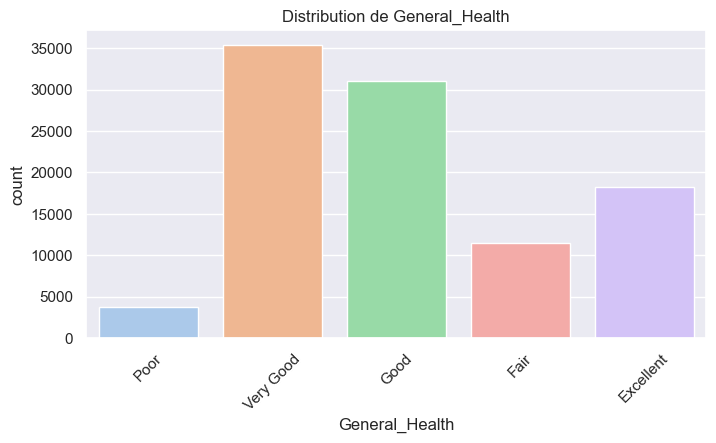

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


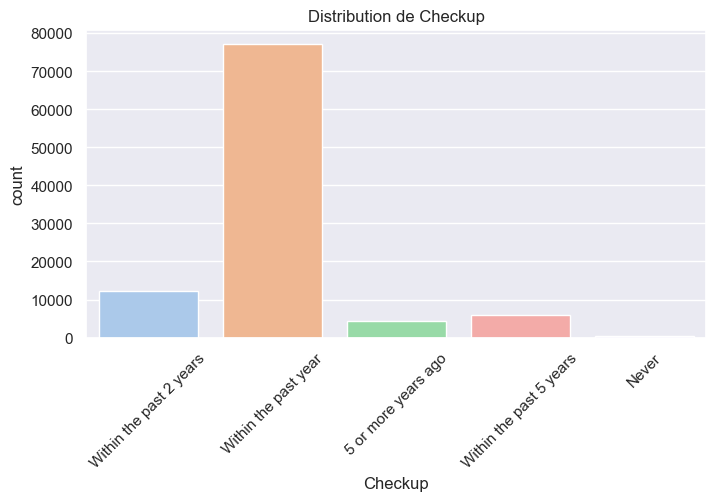

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


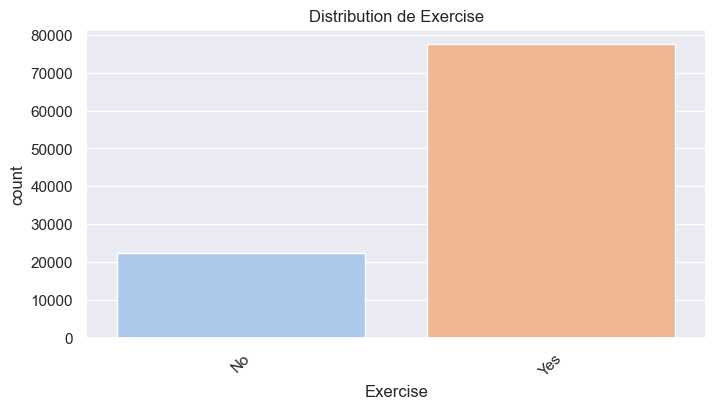

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


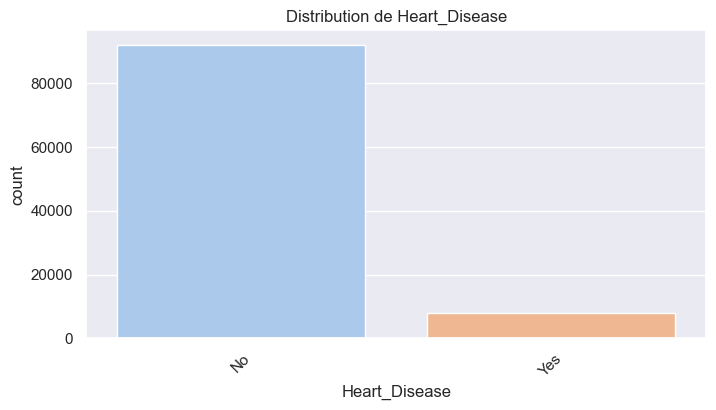

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


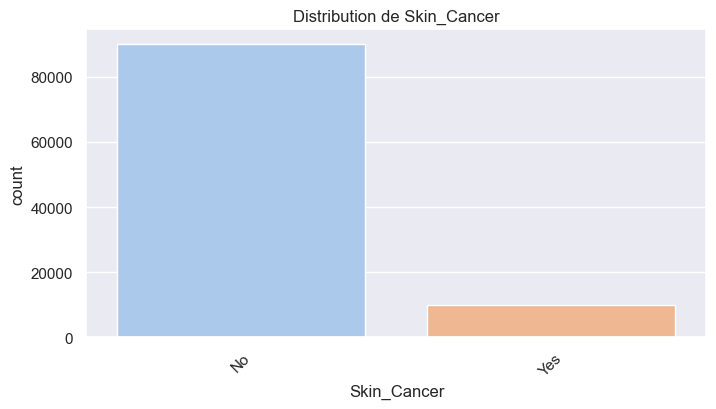

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


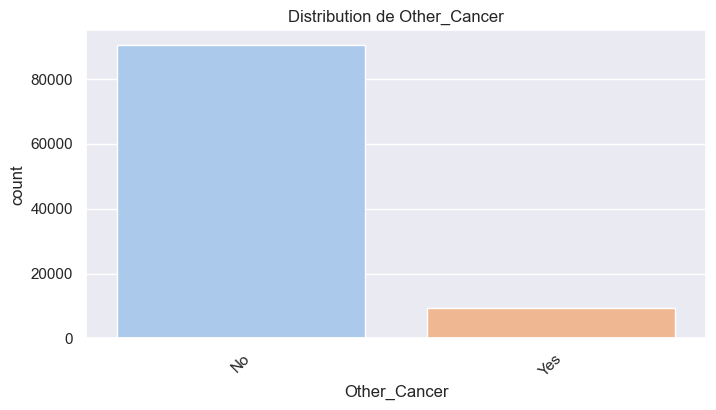

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


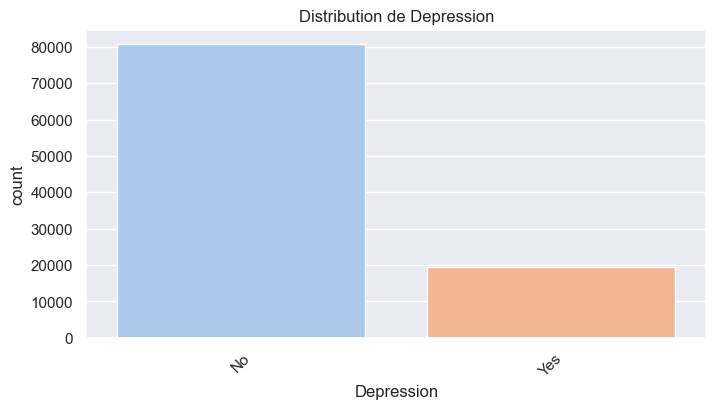

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


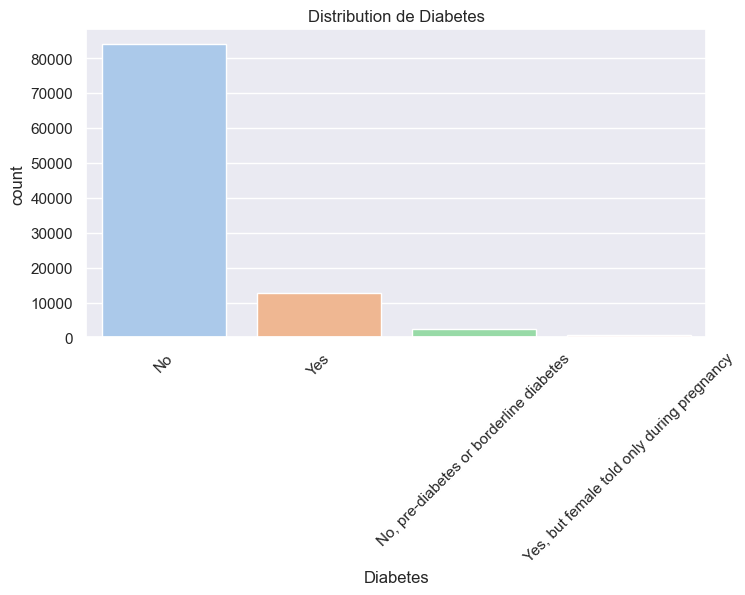

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


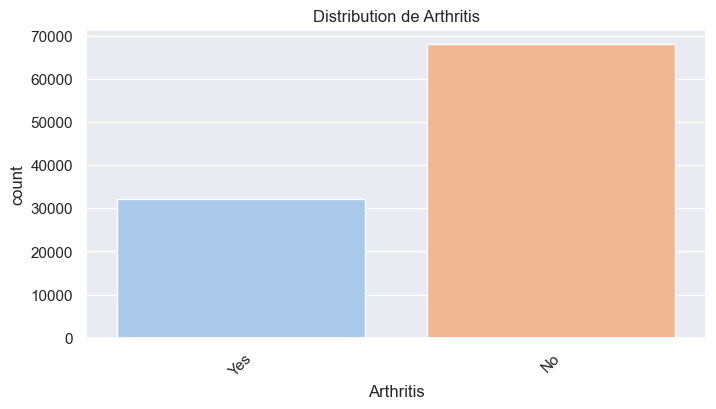

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


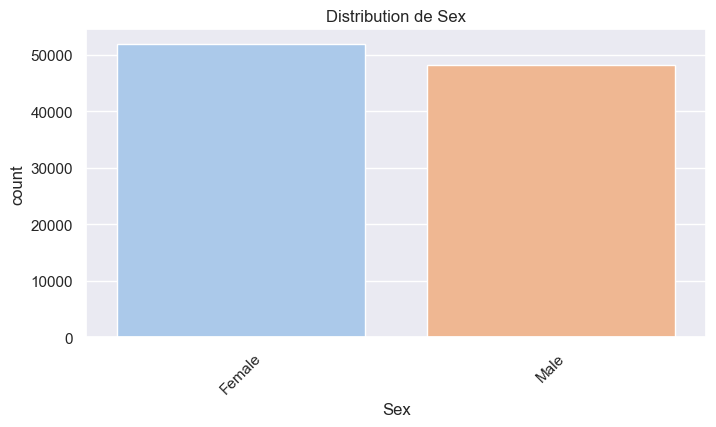

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\1598625878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")


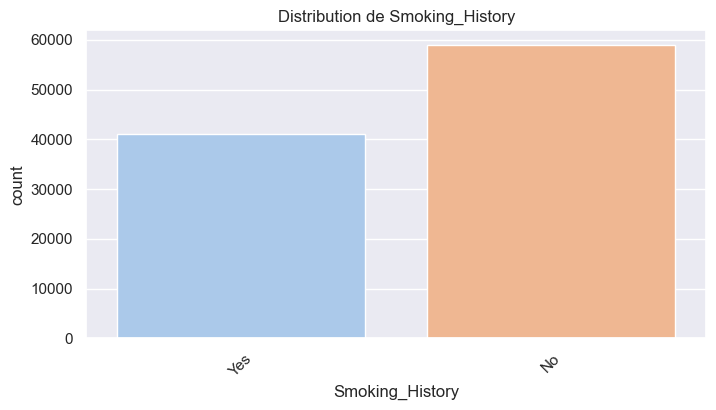

In [10]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

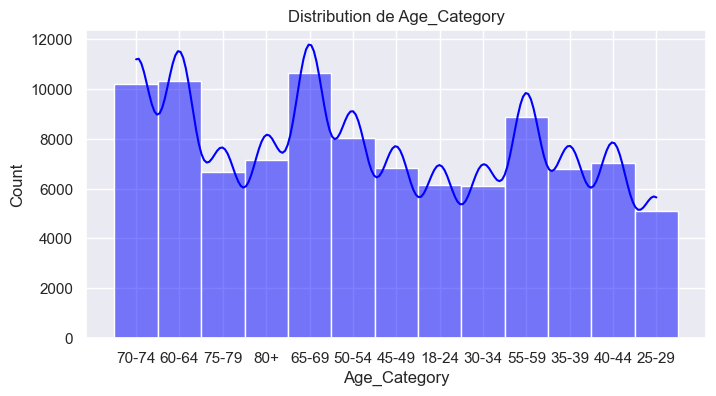

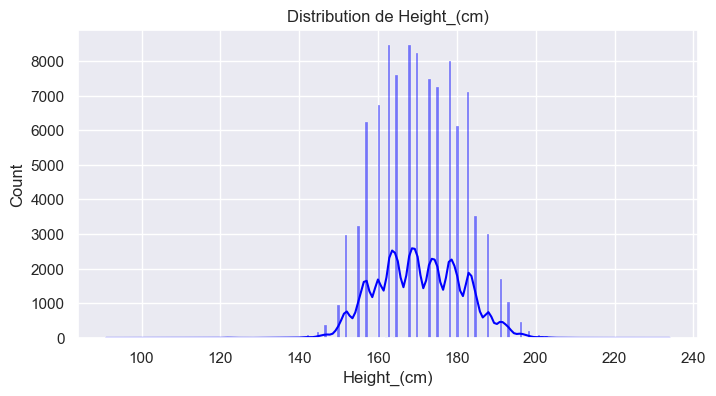

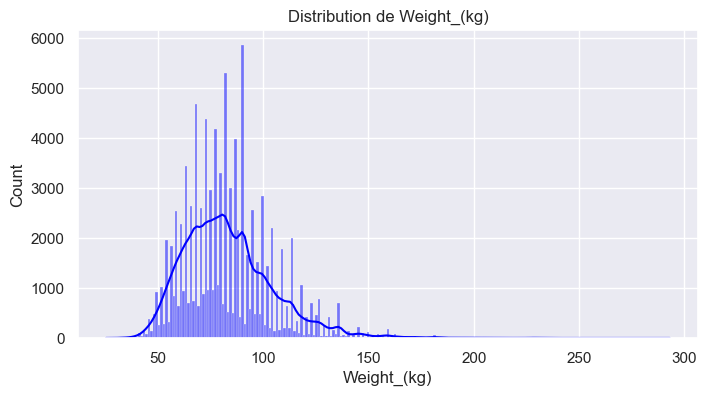

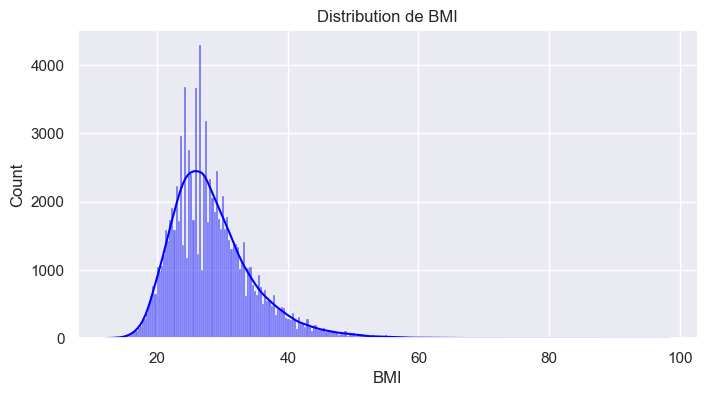

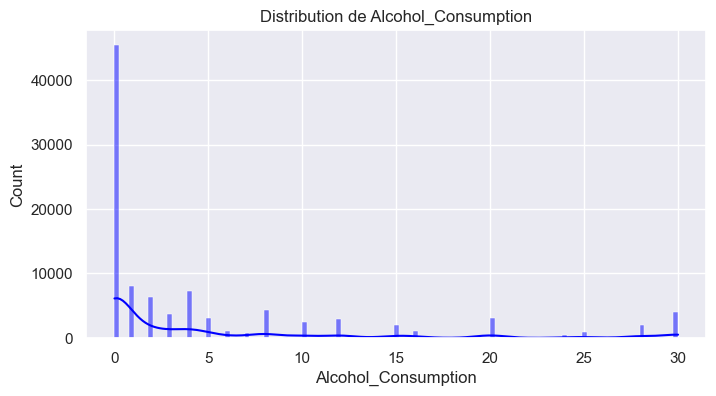

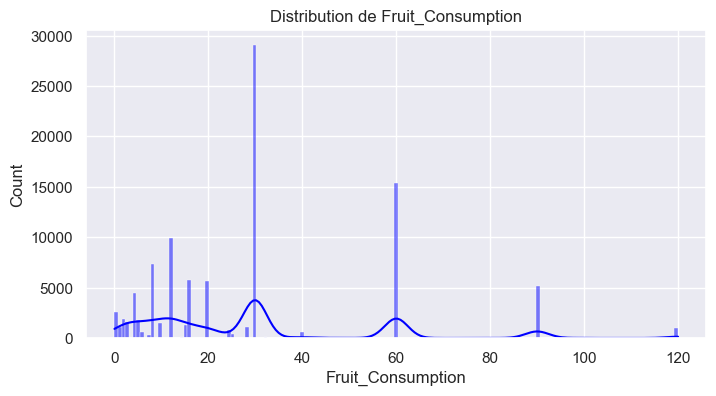

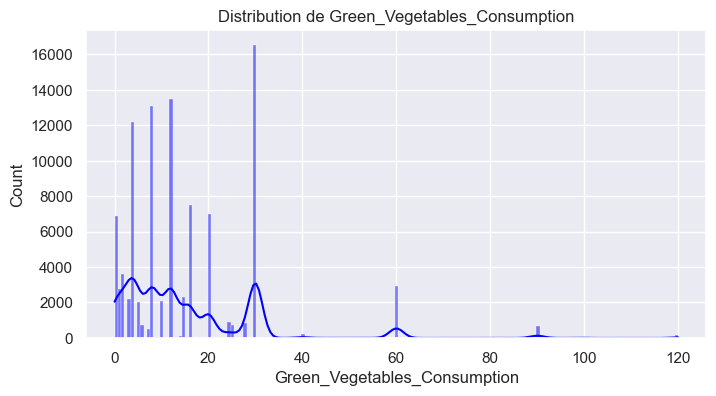

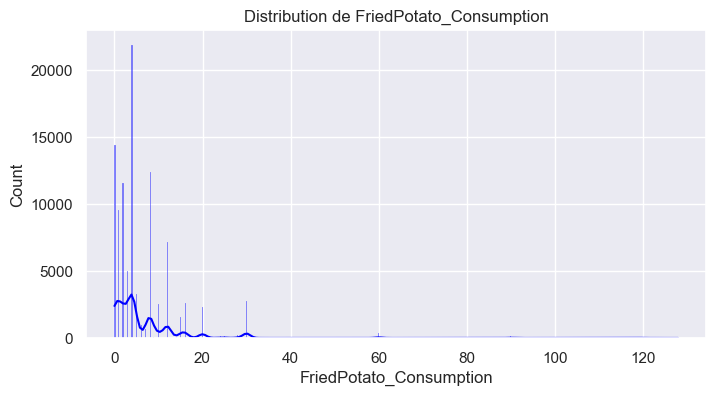

In [11]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Distribution de {col}")
    plt.show()

**Confusion matrix :**

**On examine les relations des differents features avec notre target :**

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\2906853863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y='BMI', data=df, palette="Set2")


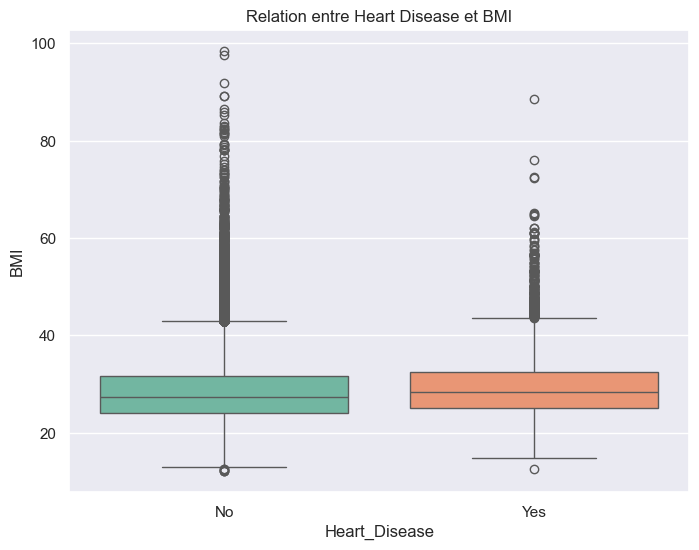

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Disease', y='BMI', data=df, palette="Set2")
plt.title("Relation entre Heart Disease et BMI")
plt.show()


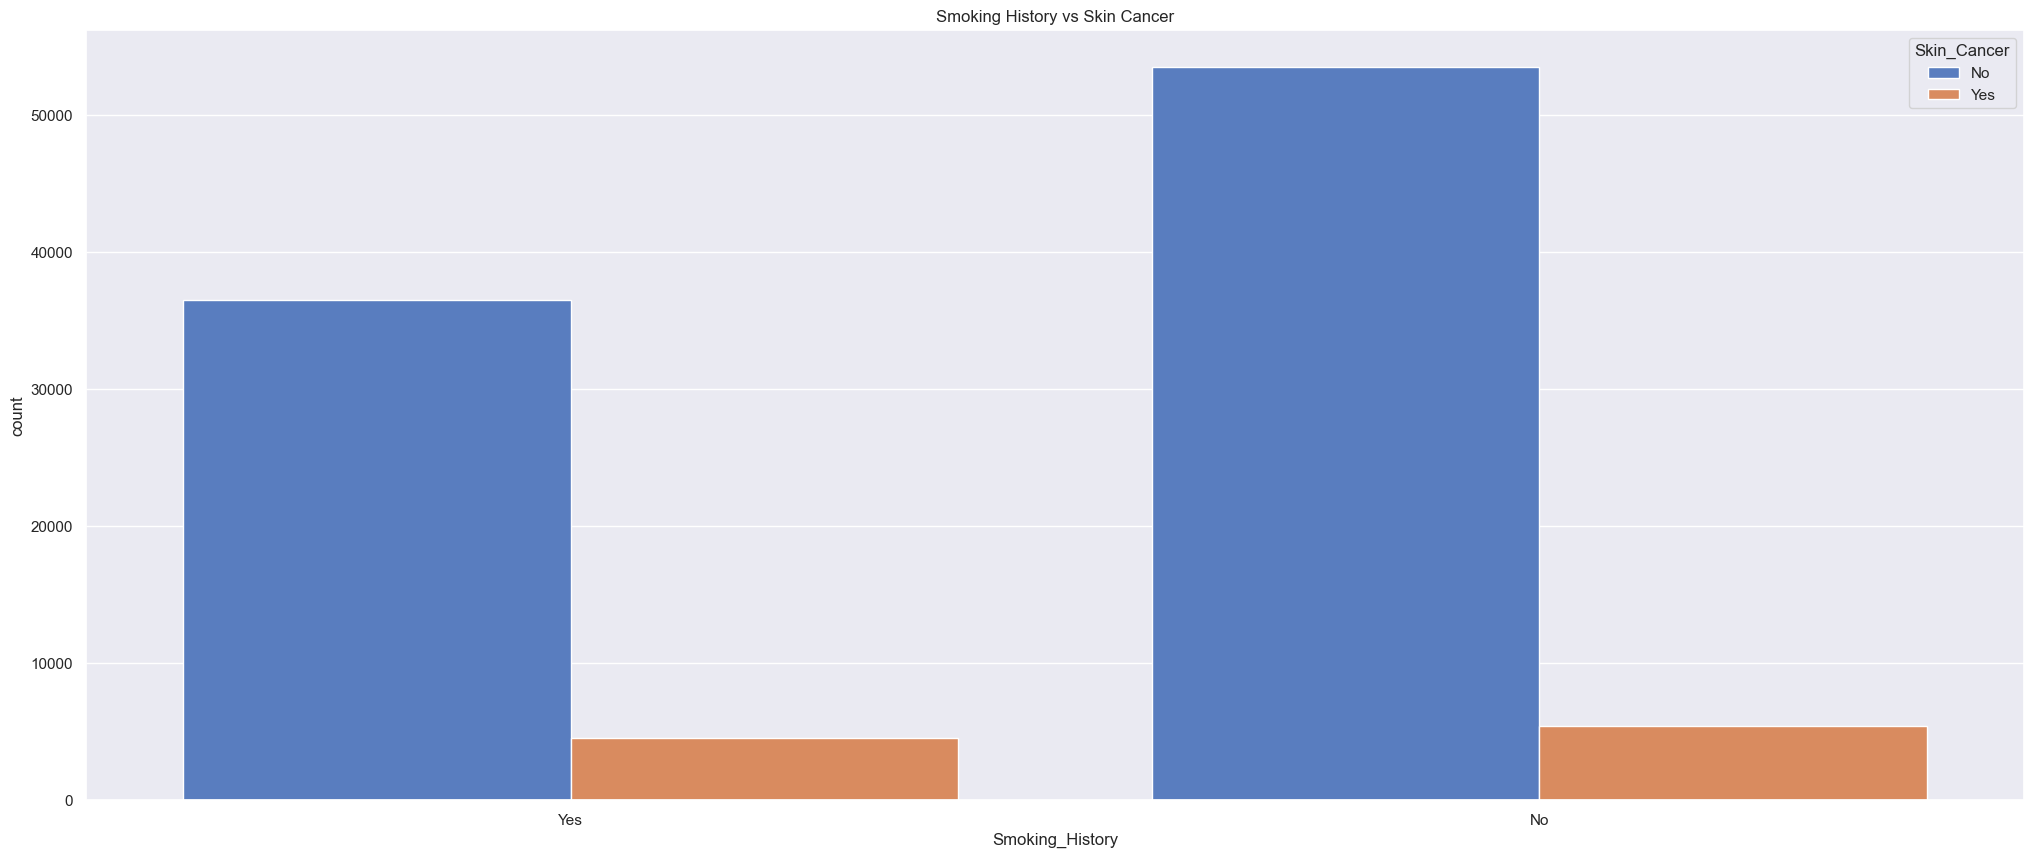

In [13]:
sns.countplot(x='Smoking_History', hue='Skin_Cancer', data=df, palette="muted")
plt.title("Smoking History vs Skin Cancer")
plt.show()

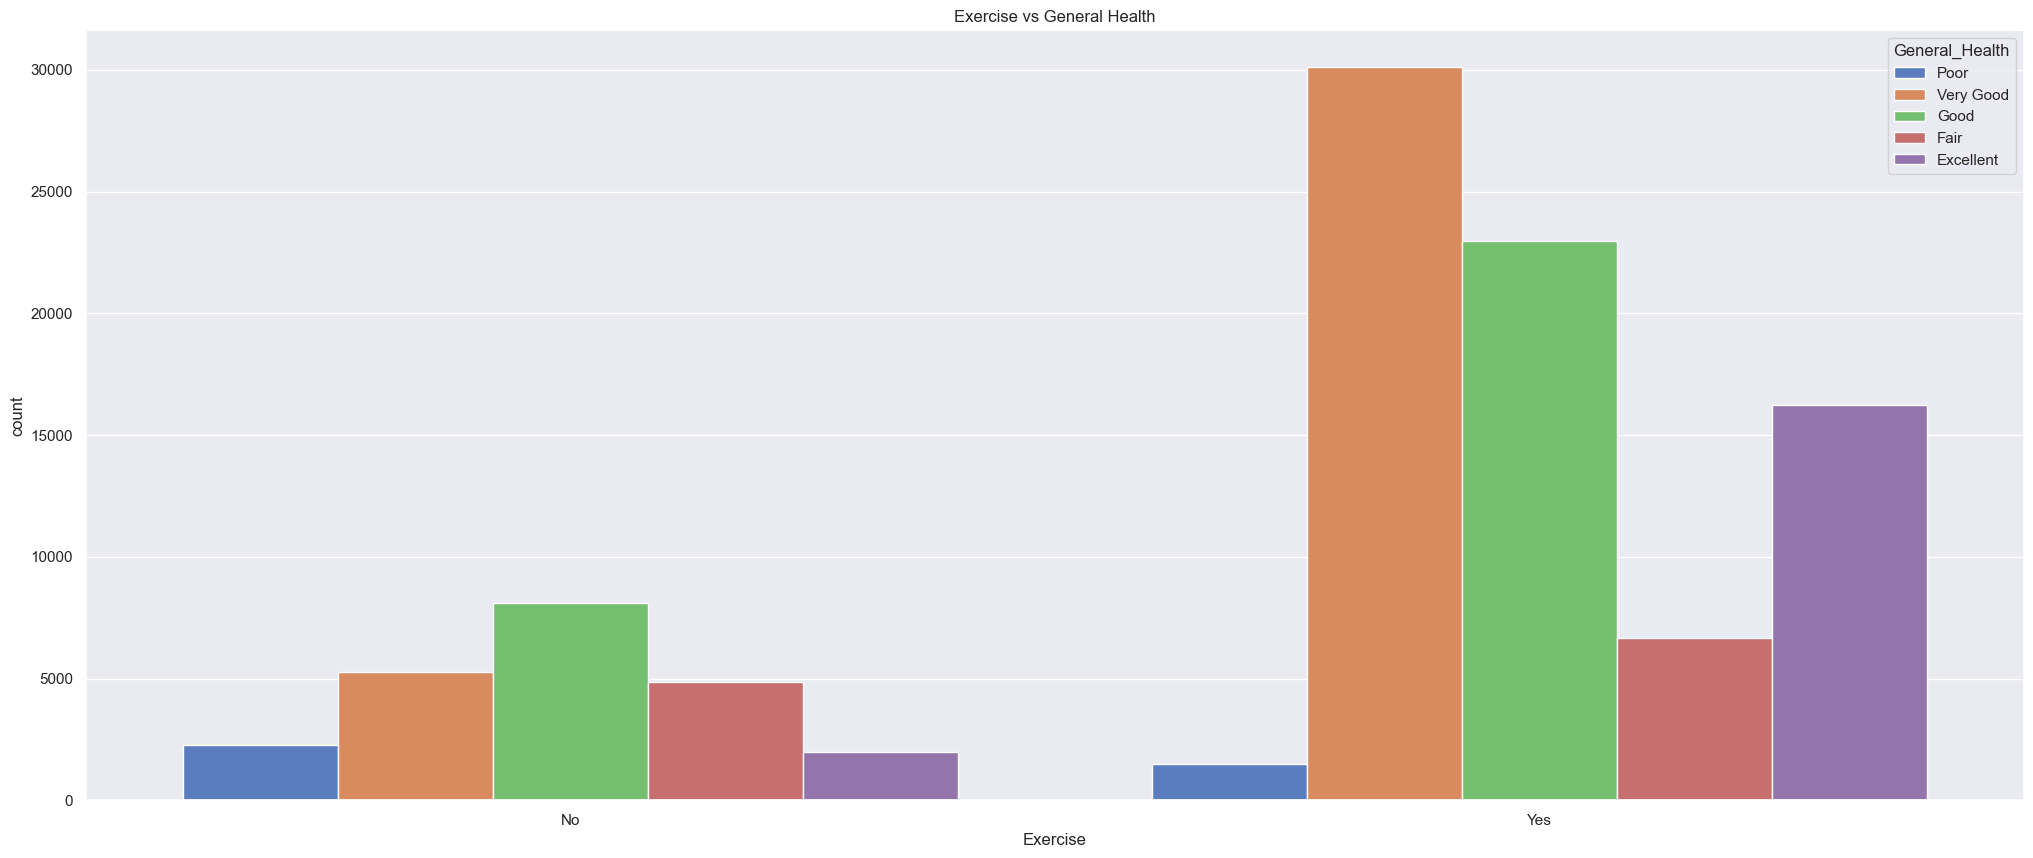

In [14]:
sns.countplot(x='Exercise', hue='General_Health', data=df, palette="muted")
plt.title("Exercise vs General Health")
plt.show()


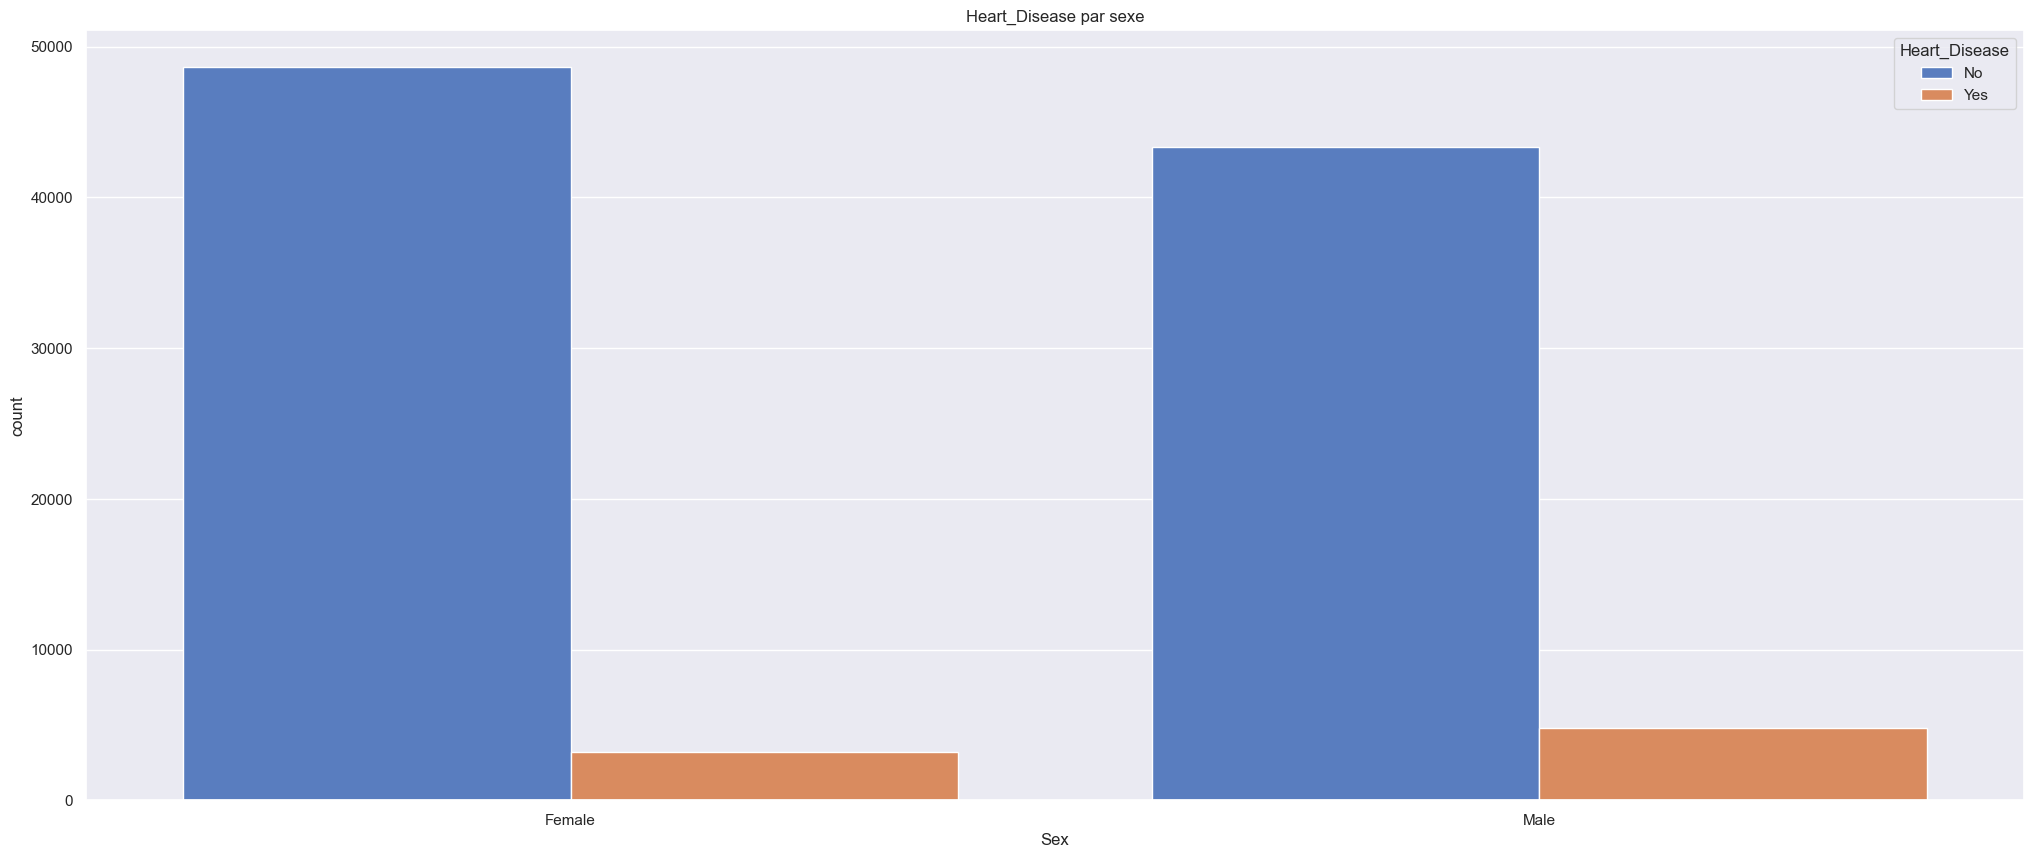

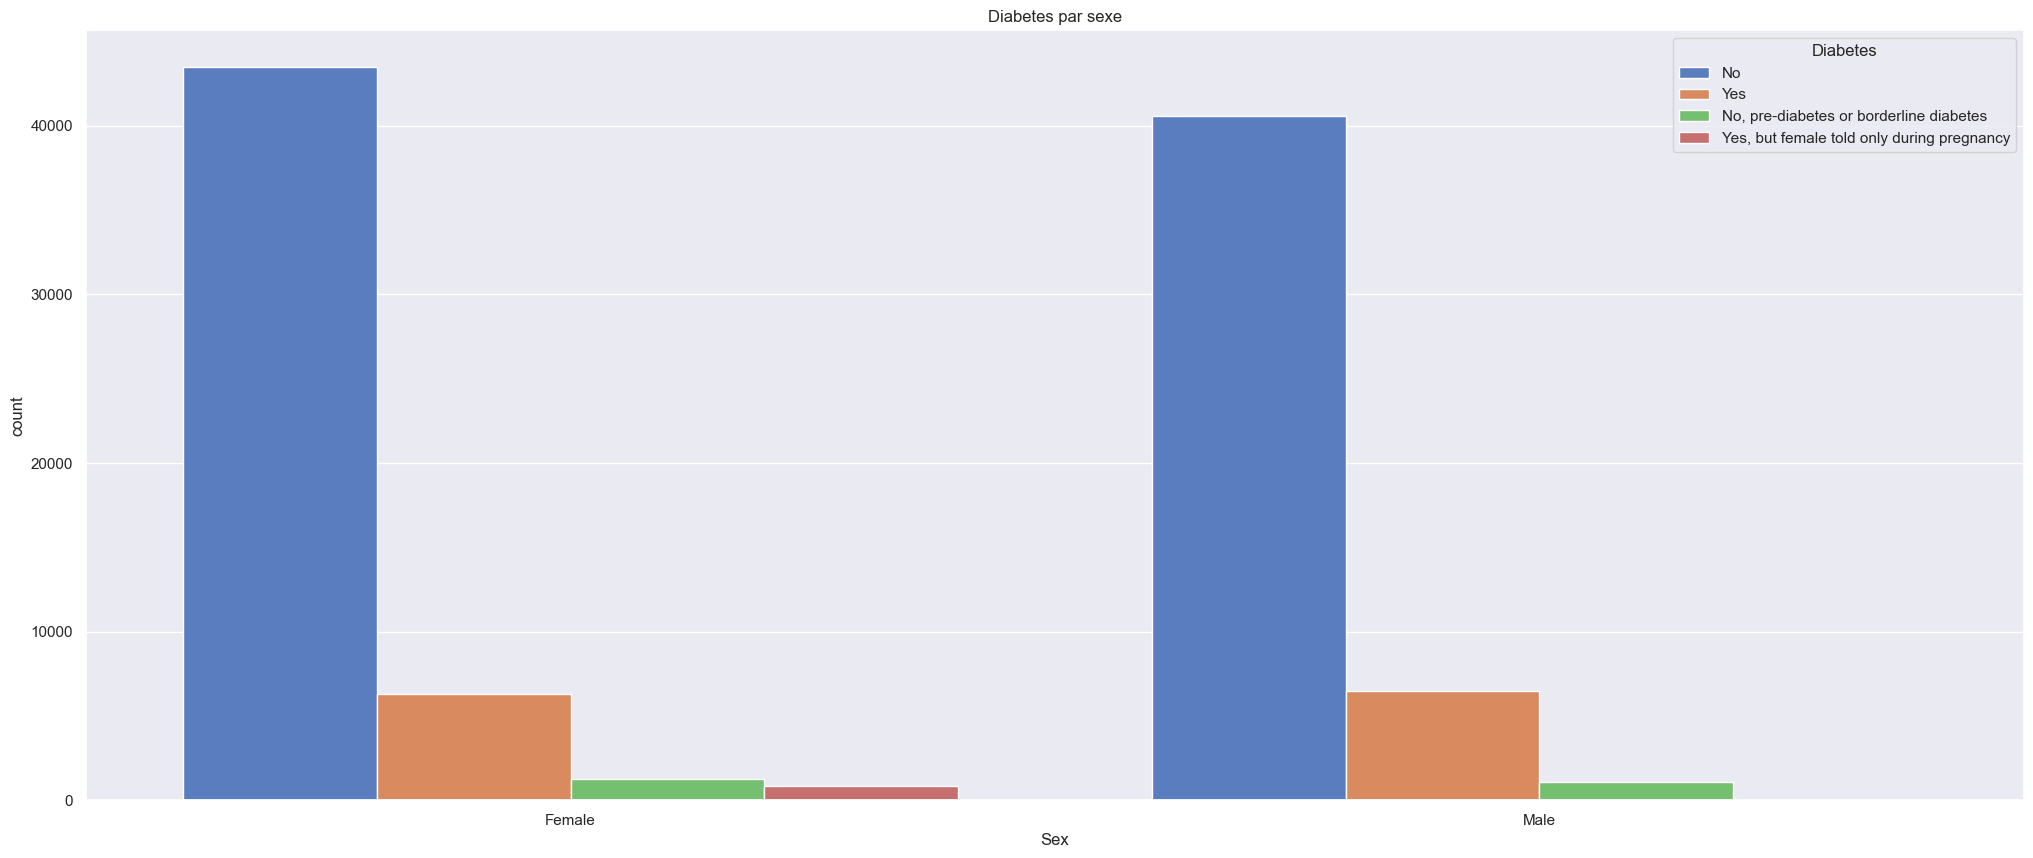

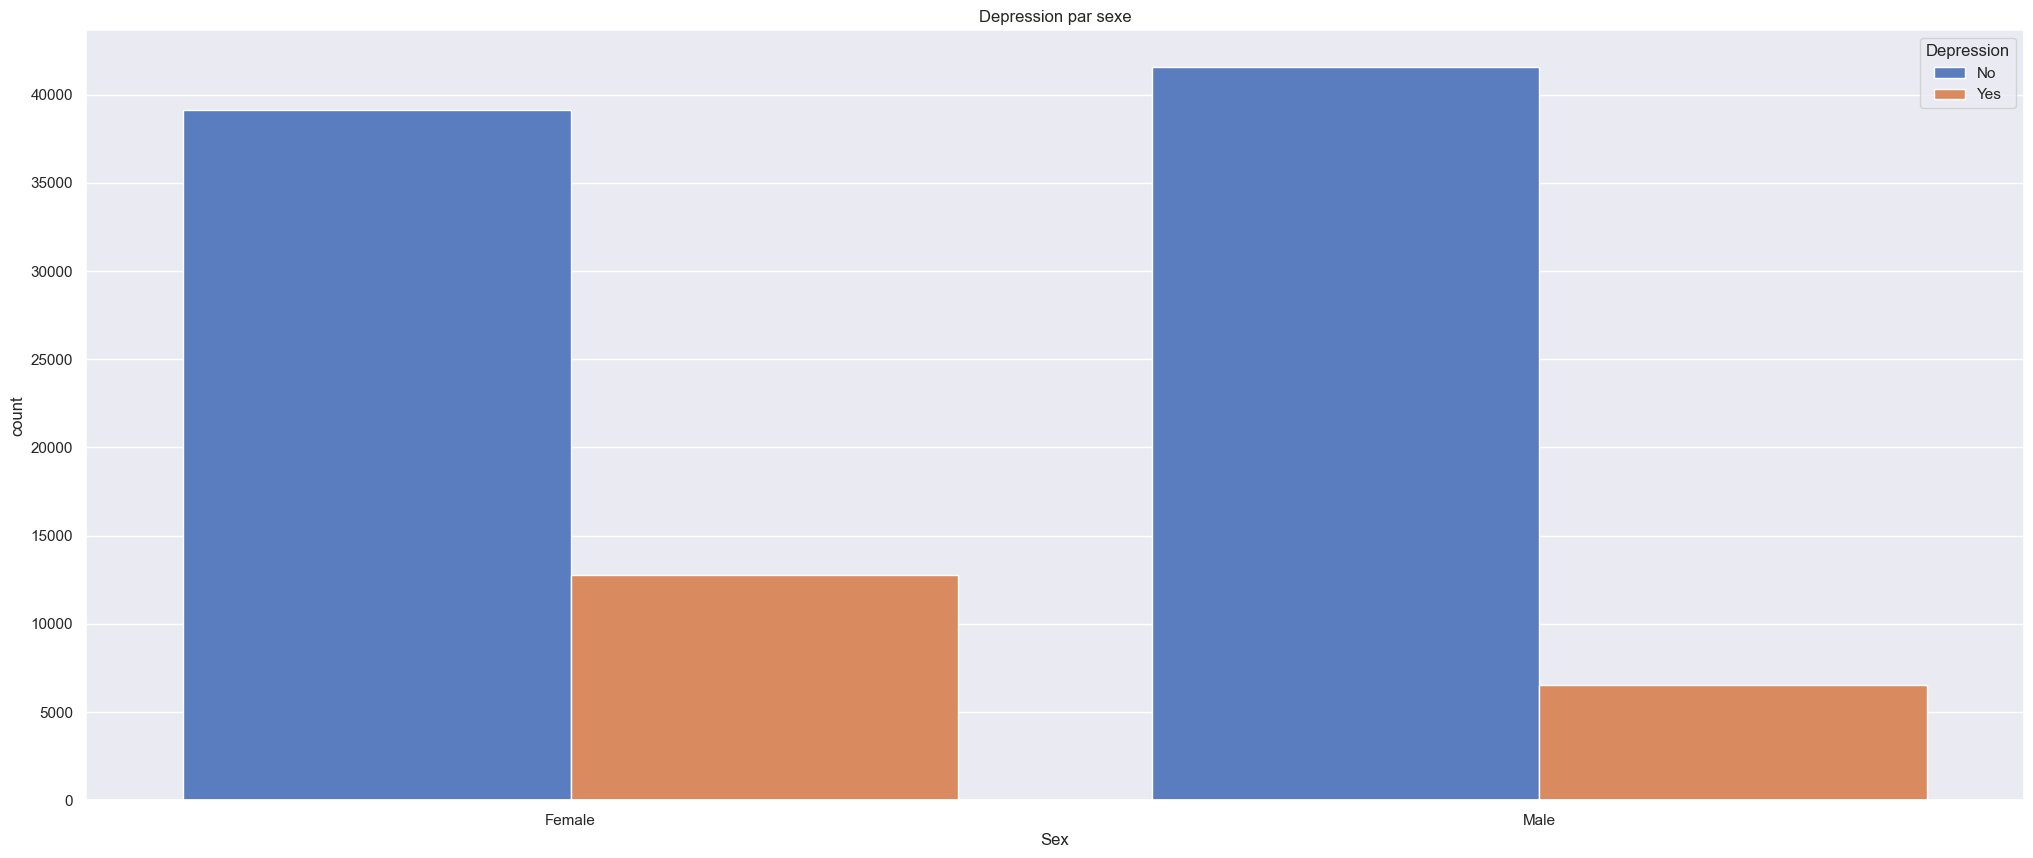

In [15]:
for col in ['Heart_Disease', 'Diabetes', 'Depression']:
    sns.countplot(x='Sex', hue=col, data=df, palette="muted")
    plt.title(f"{col} par sexe")
    plt.show()


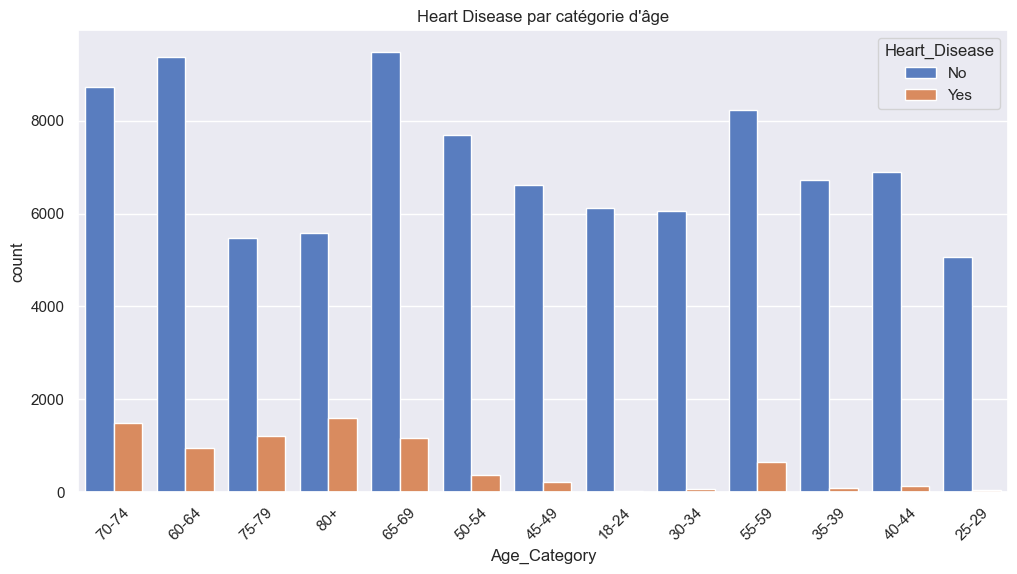

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Category', hue='Heart_Disease', data=df, palette="muted")
plt.title("Heart Disease par catégorie d'âge")
plt.xticks(rotation=45)
plt.show()


**Target Variable Visualization (Heart_Disease) :**

C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\2668147513.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart_Disease', data=df, palette=colors, edgecolor='black')
C:\Users\MSI\AppData\Local\Temp\ipykernel_26492\2668147513.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])


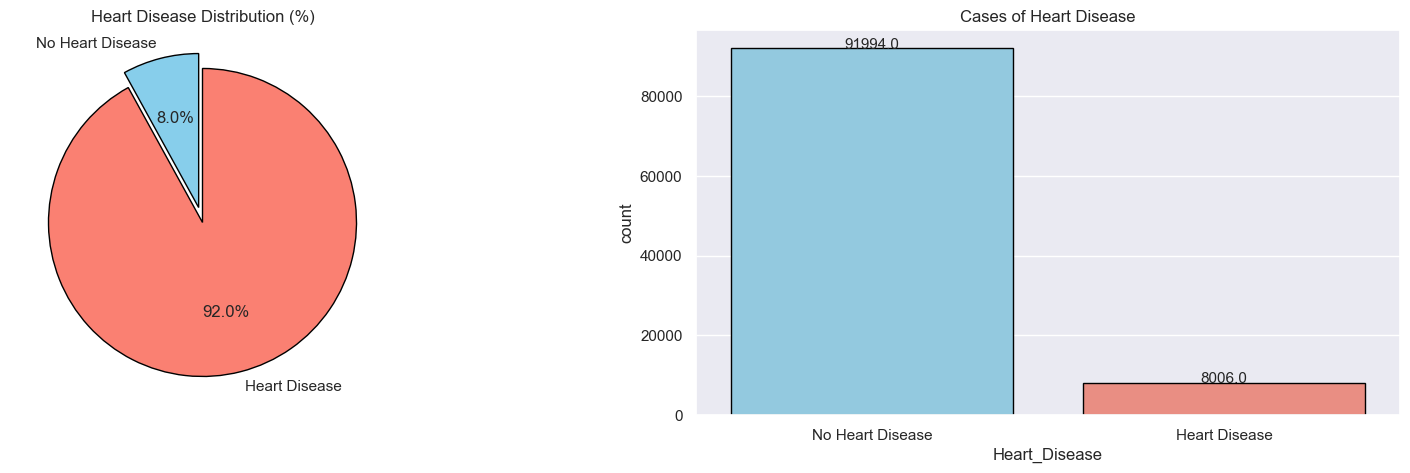

In [17]:
# Graphique combiné : Diagramme circulaire + Diagramme en barres
l = list(df['Heart_Disease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

colors = ['skyblue', 'salmon']  

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], 
        autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease Distribution (%)')

# Diagramme en barres
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Heart_Disease', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, 
            str(rect.get_height()), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()


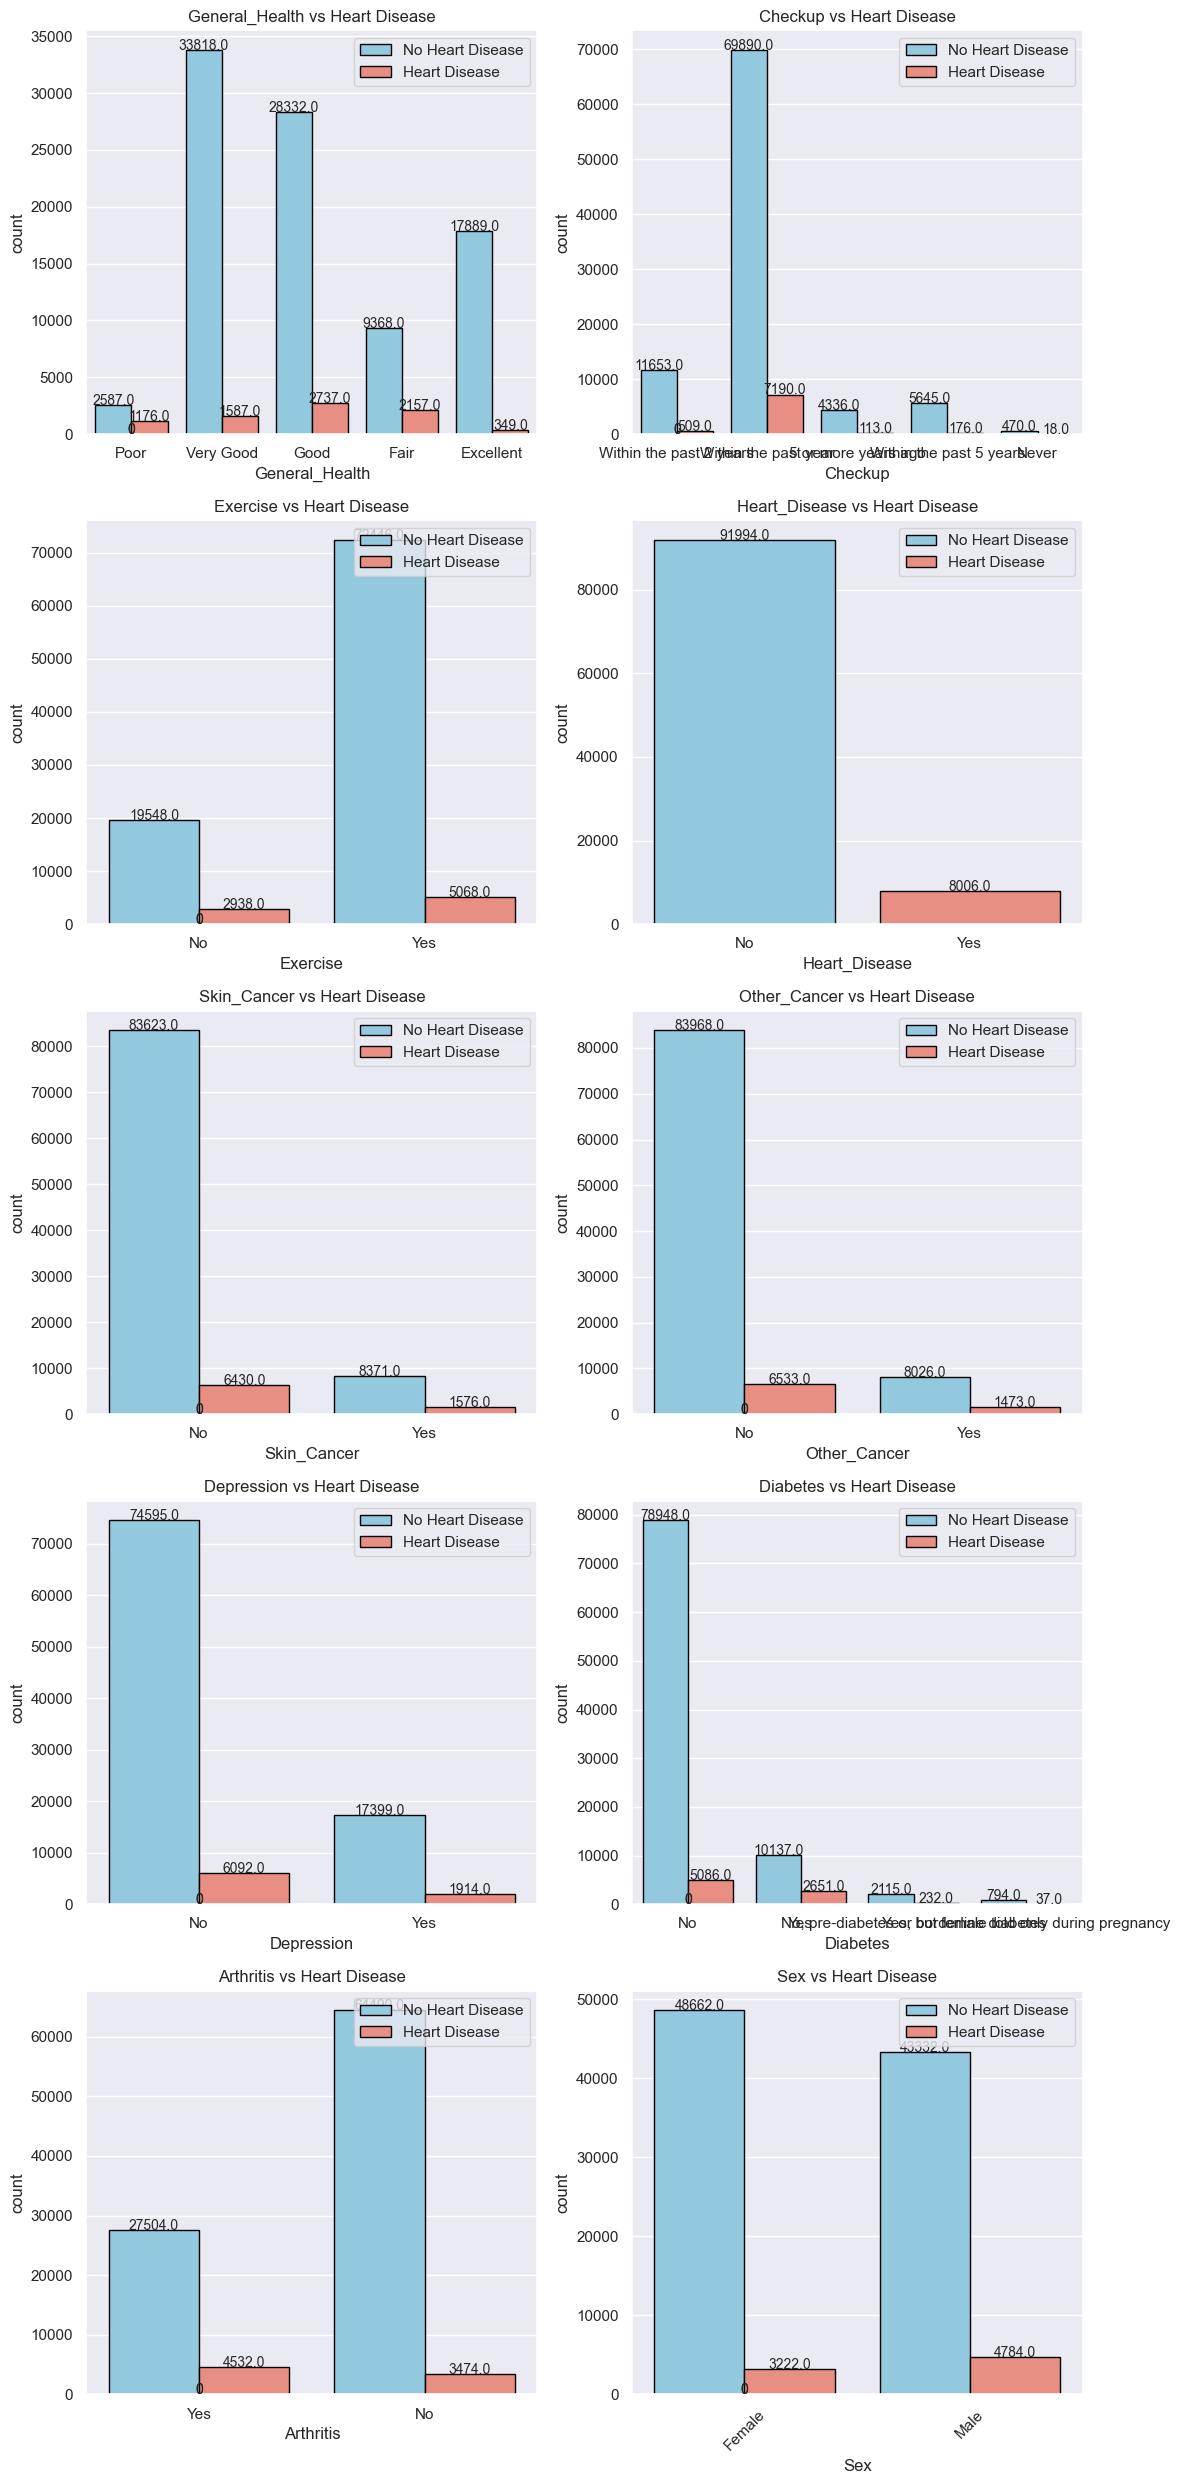

In [18]:
n_features = len(categorical_features) - 1  
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  
plt.xticks(rotation=45)

for i, feature in enumerate(categorical_features[:-1]):
    ax = axes[i]
    sns.countplot(x=feature, data=df, hue="Heart_Disease", palette=colors, edgecolor='black', ax=ax)
    plt.xticks(rotation=45)

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
                str(rect.get_height()), horizontalalignment='center', fontsize=10)
    ax.set_title(f'{feature} vs Heart Disease')
    plt.xticks(rotation=45)
    ax.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyse bivariante :**

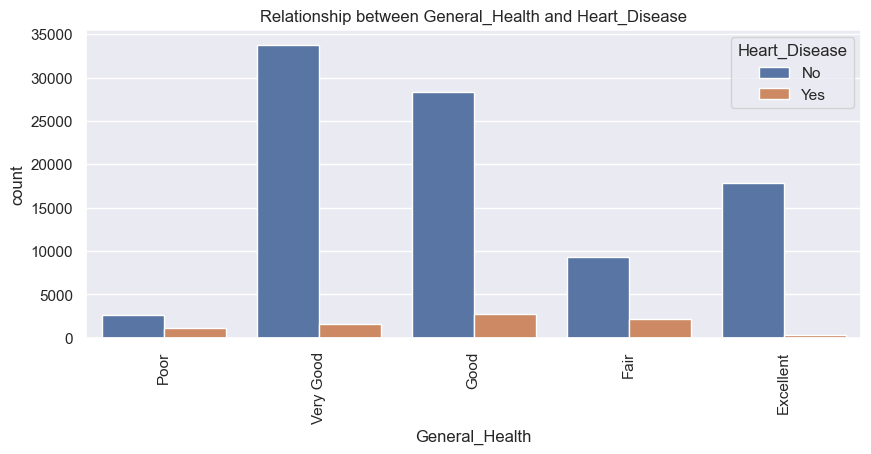

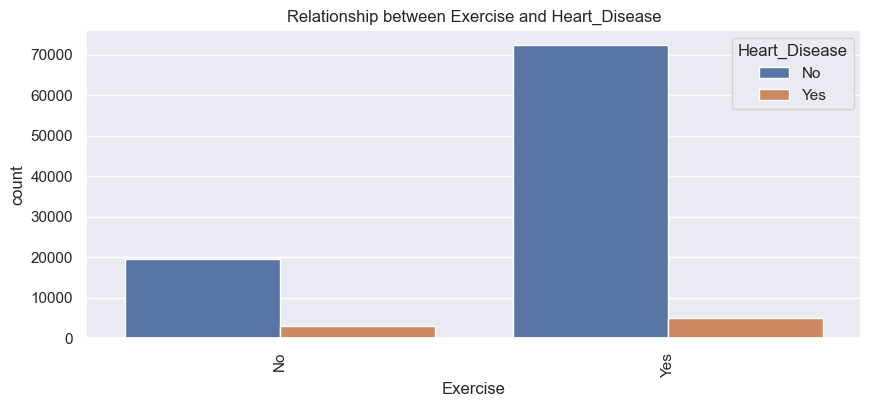

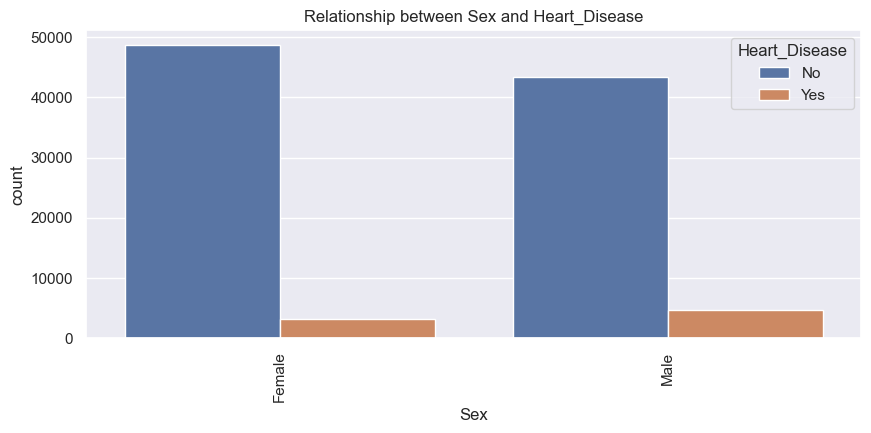

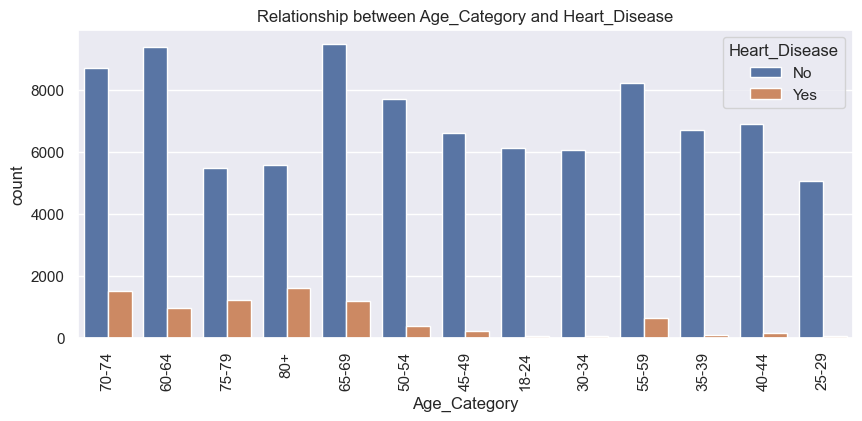

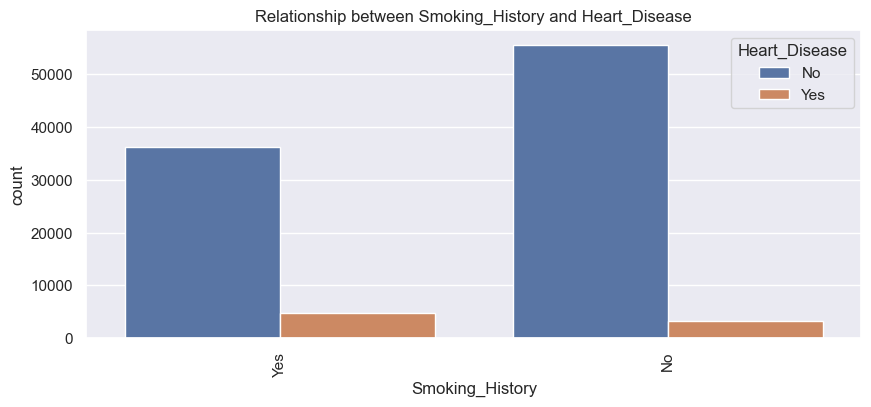

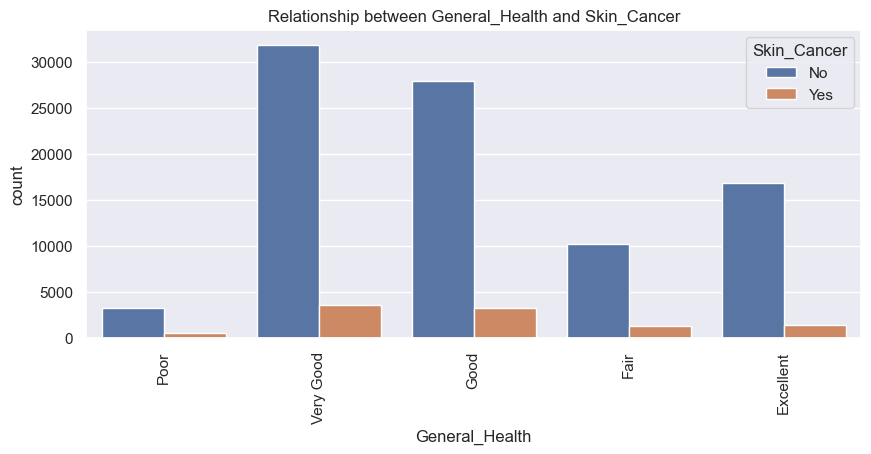

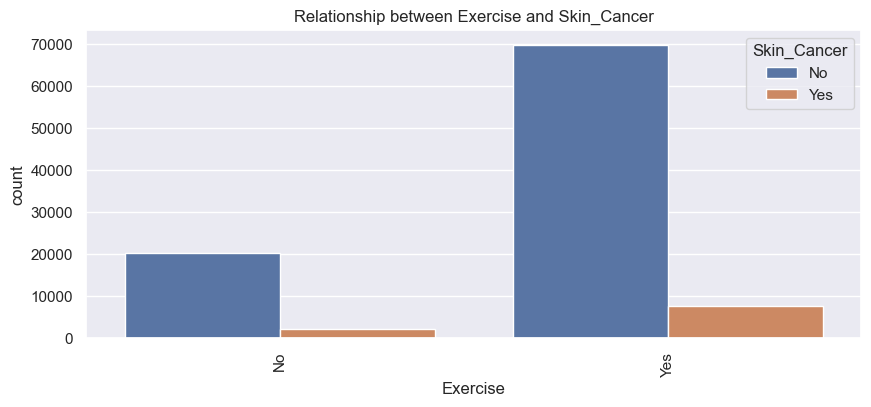

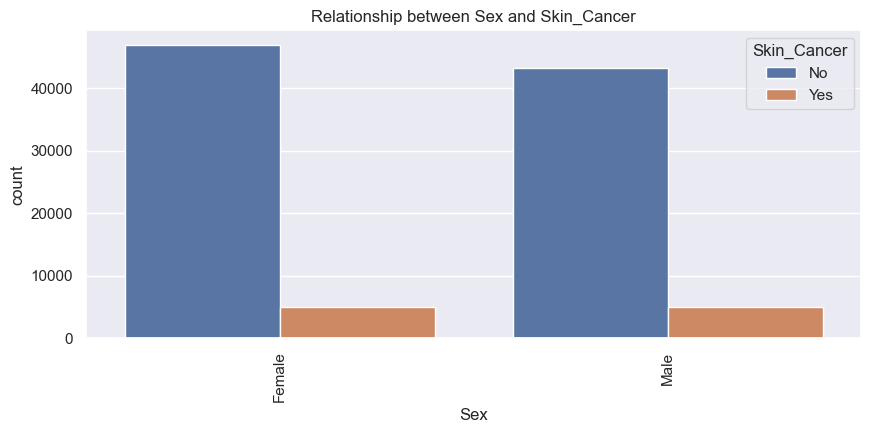

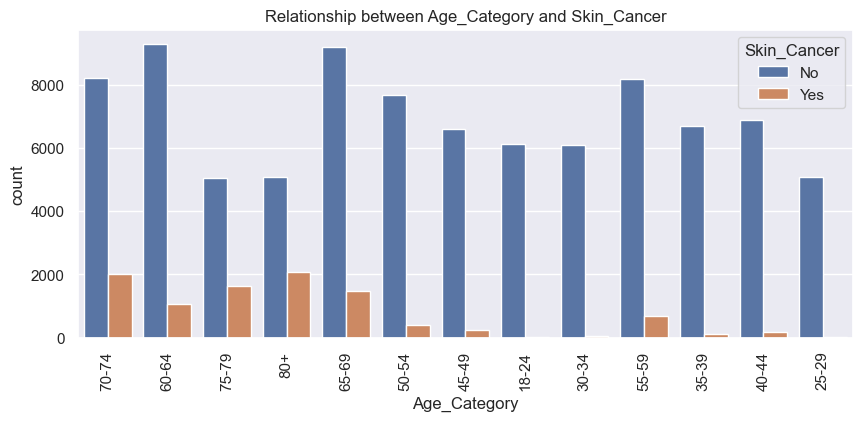

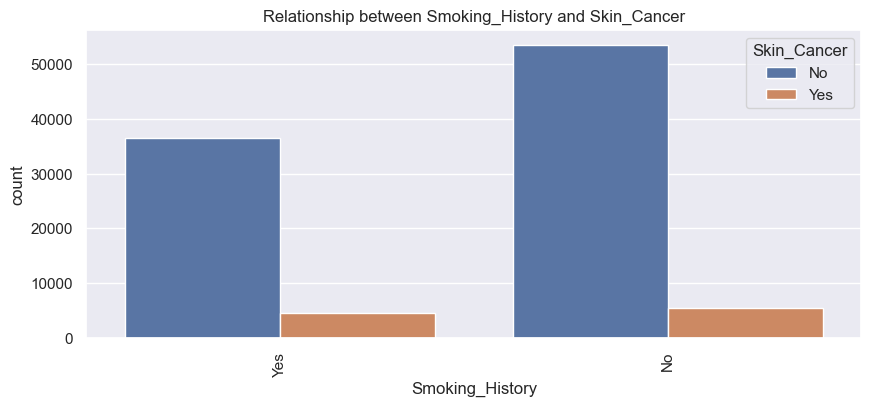

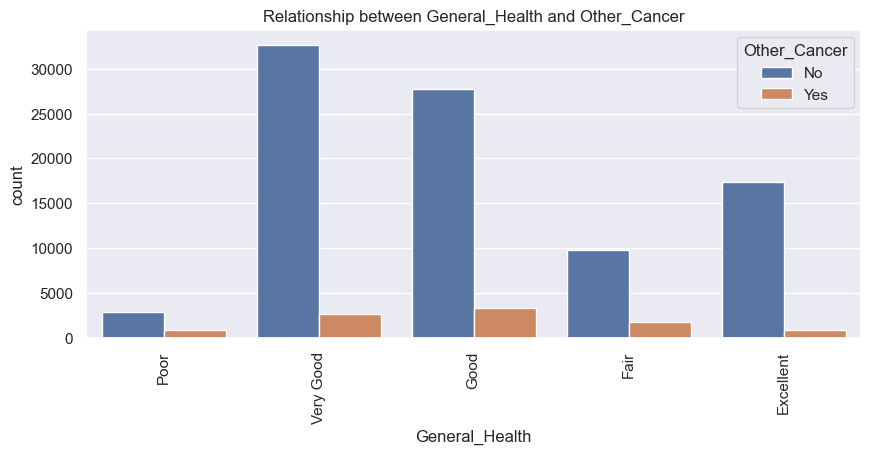

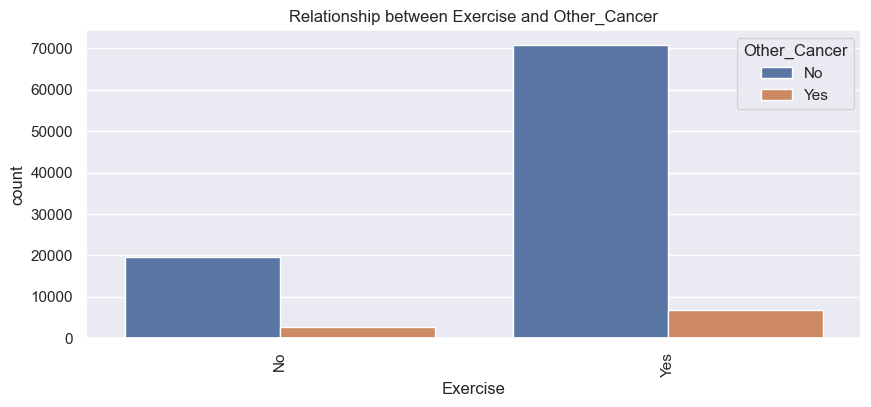

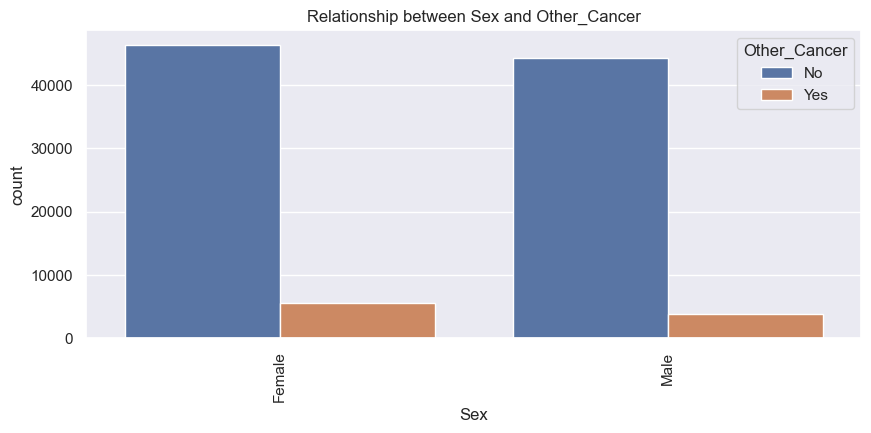

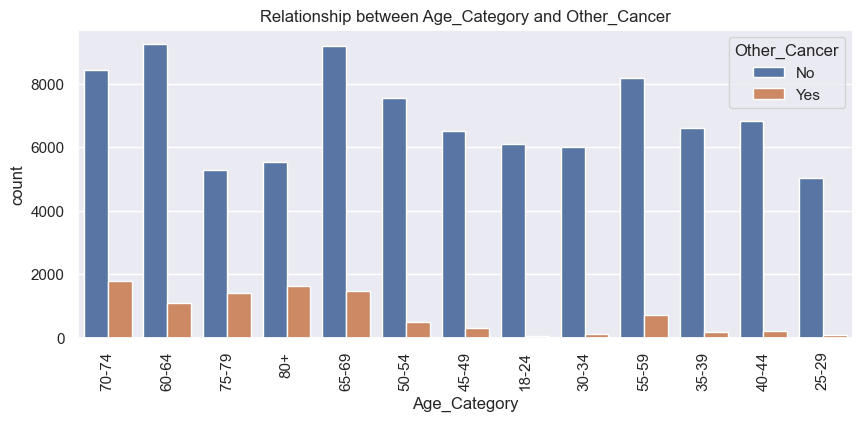

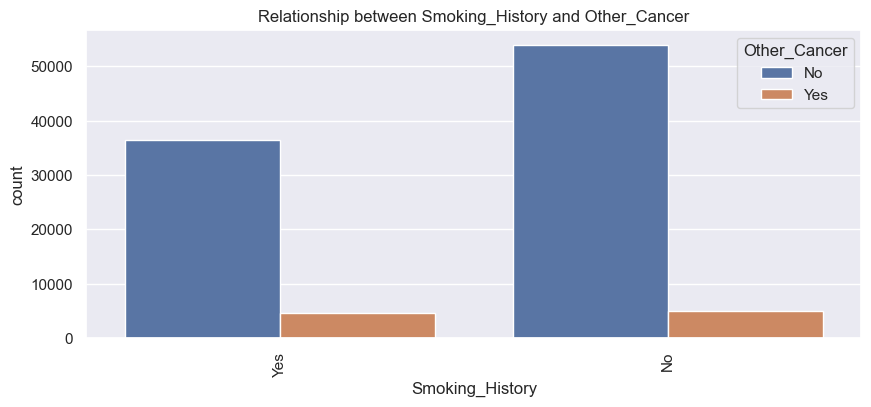

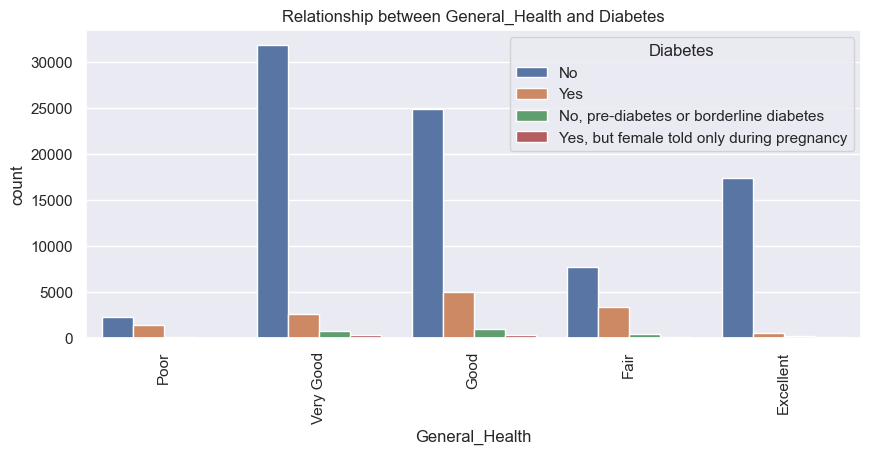

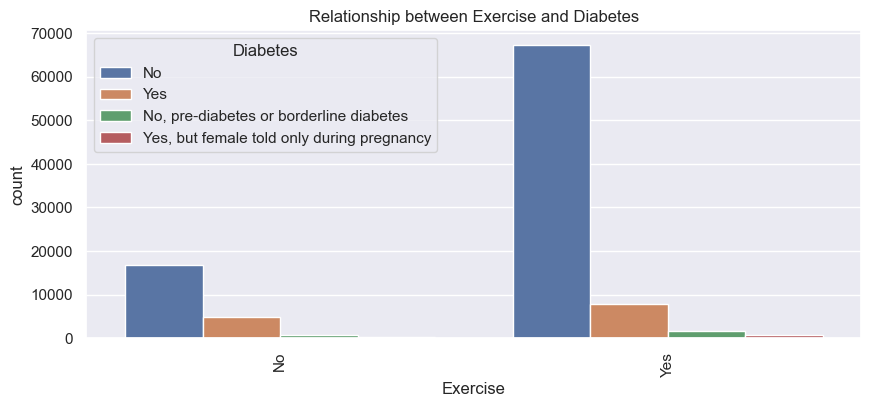

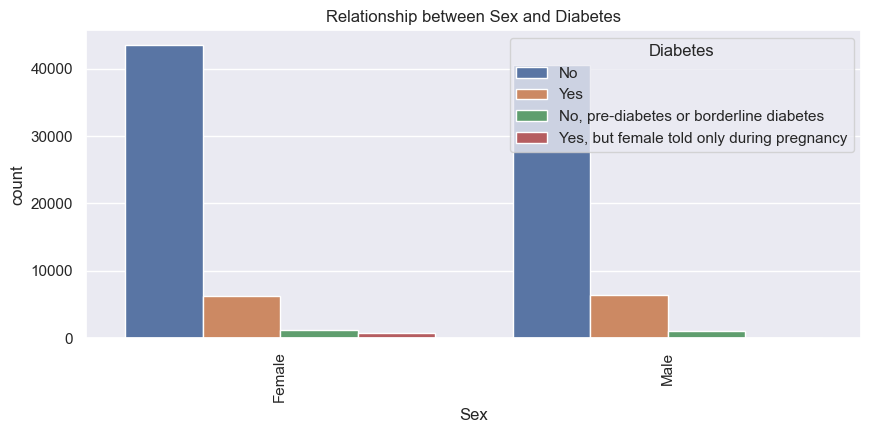

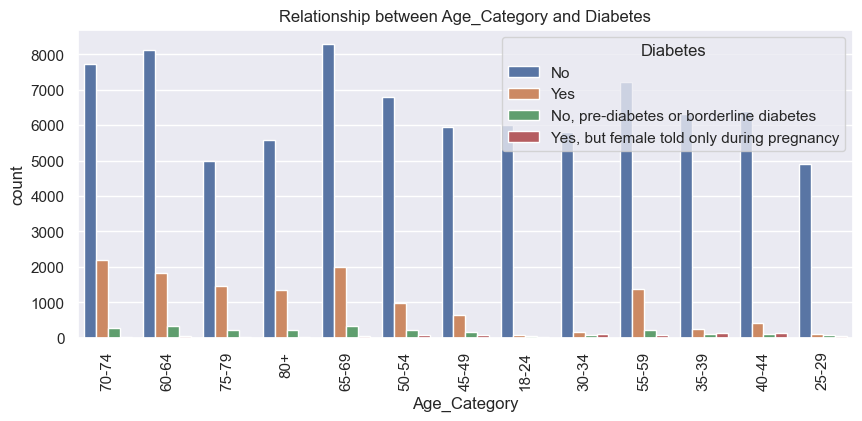

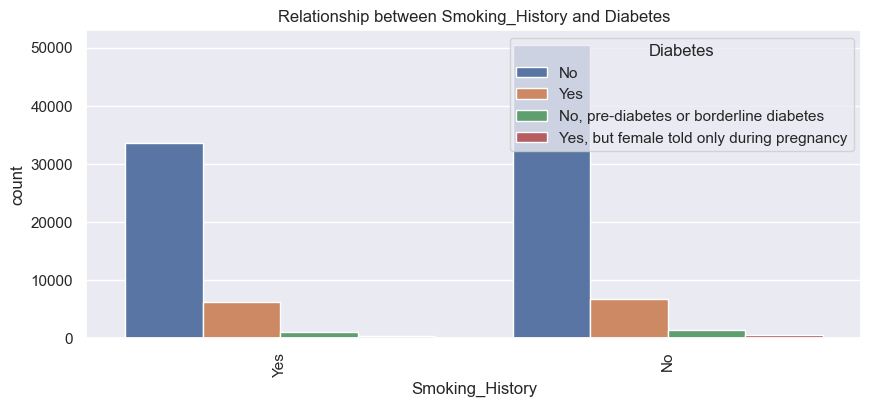

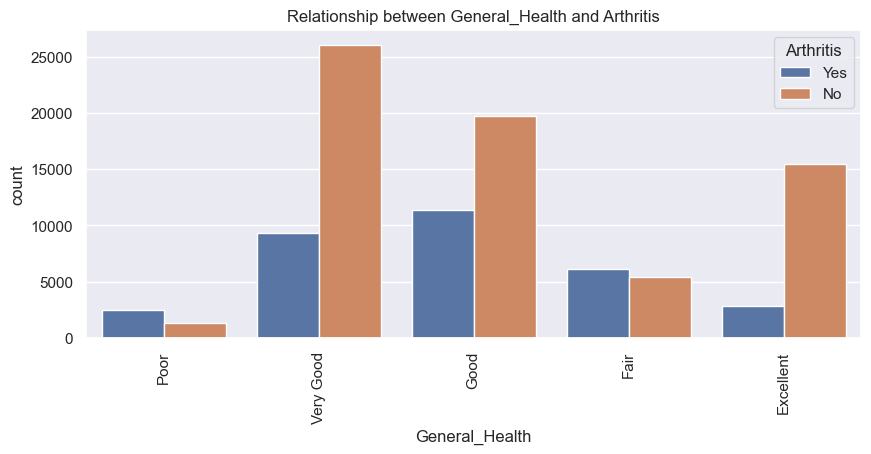

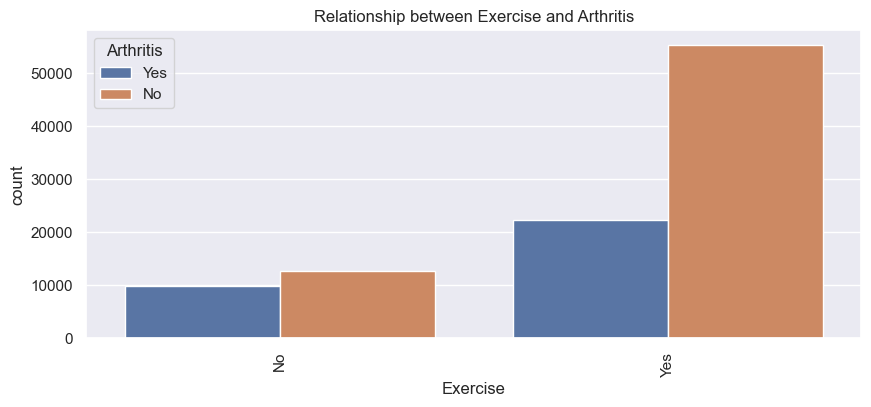

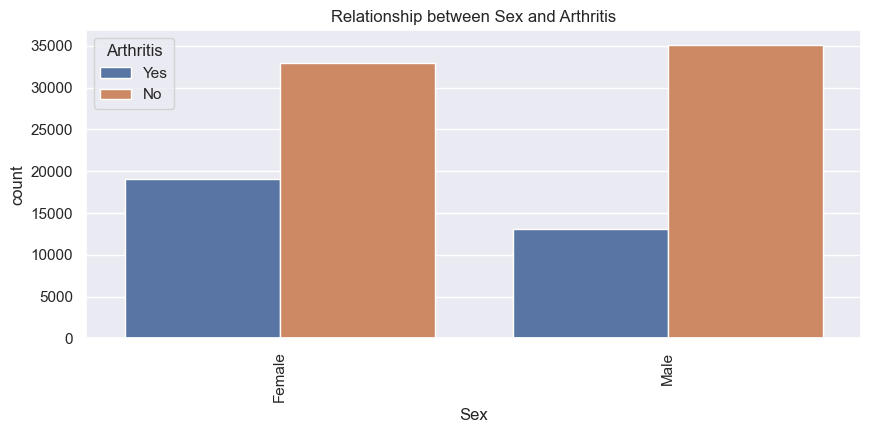

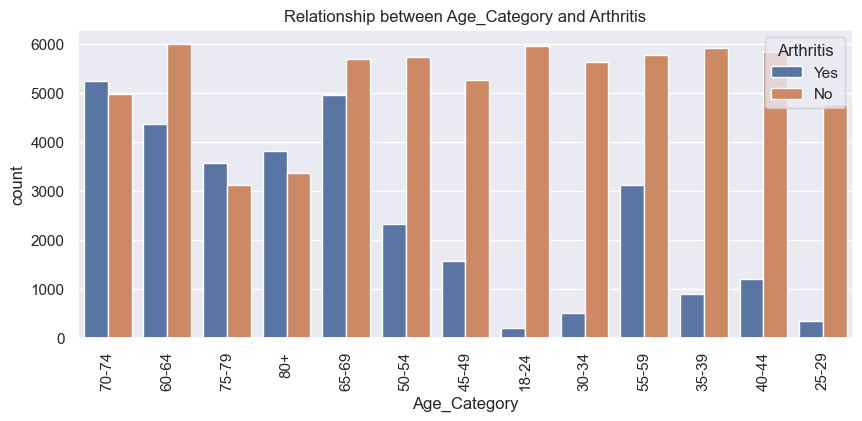

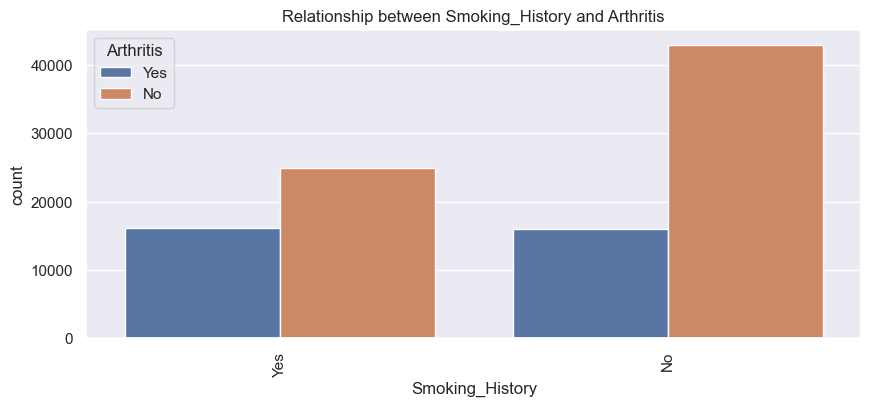

In [19]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

**Matrice de confusion :**

**Encodage des valeurs categorique :**

In [20]:
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)
df = pd.get_dummies(df, columns=['Sex'])
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
df['Checkup'] = df['Checkup'].map(checkup_mapping)
age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)    


In [21]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,True,False
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,True,False
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,True,False
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,False,True
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,4.0,1,0,0,0,0,0,0,11,165.0,74.84,27.46,1,5.0,30.0,8.0,0.0,True,False
99996,2,2.0,1,0,0,0,0,0,0,8,193.0,90.72,24.34,1,4.0,30.0,30.0,0.0,False,True
99997,3,4.0,0,0,0,0,0,0,1,12,152.0,52.62,22.65,0,0.0,30.0,3.0,2.0,True,False
99998,3,4.0,1,0,0,0,0,0,1,8,168.0,97.52,34.70,1,15.0,90.0,24.0,2.0,True,False


In [22]:
df = df.drop_duplicates()

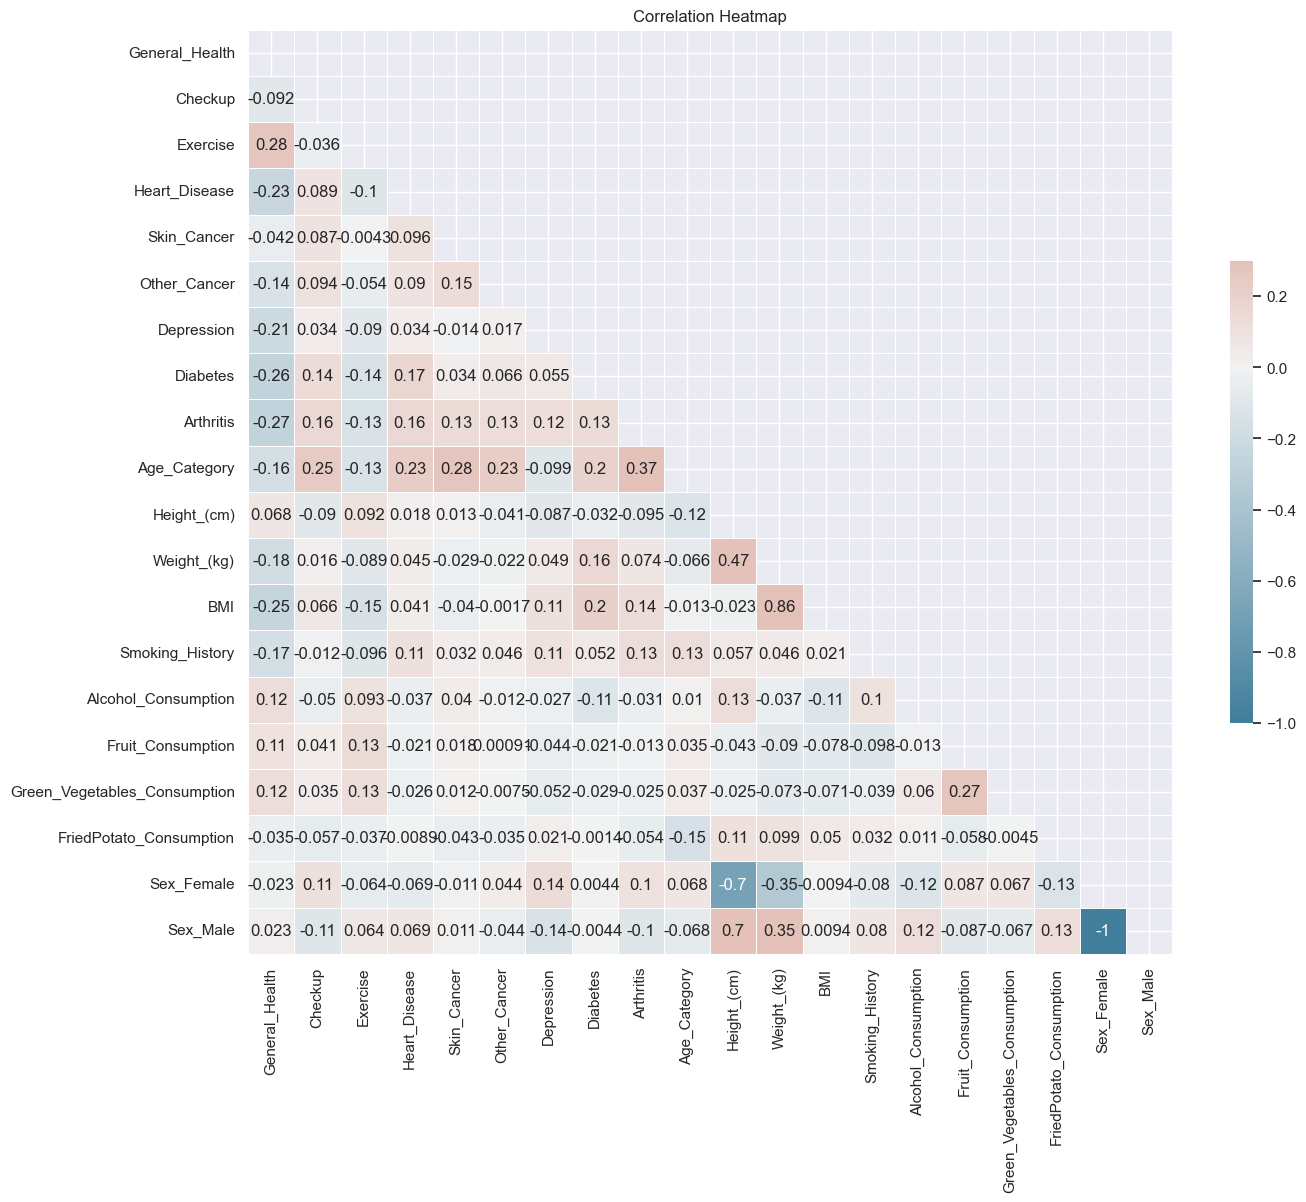

In [23]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Les valeurs de corrélation vont de -1 à 1. 

Les valeurs plus proches de 1 représentent une forte corrélation positive.

les valeurs plus proches de -1 représentent une forte corrélation négative. 

les valeurs autour de 0 représentent aucune corrélation.
